# Used Car Marketplace Dummy Data Insertion

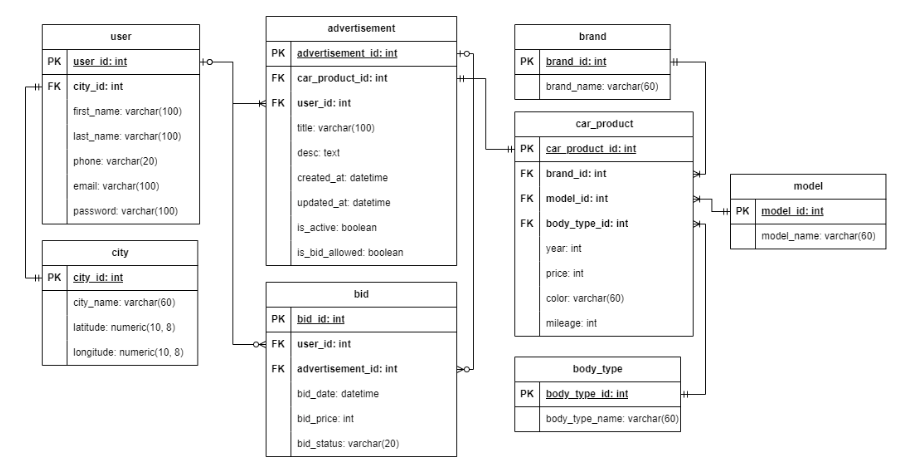

# Import Libs

In [216]:
# Import Library yang akan digunakan
from faker import Faker
from tabulate import tabulate
import random
import pandas as pd
from datetime import datetime, timedelta
import csv
import random
import hashlib

In [47]:
# Definisikan bahwa data yang digunakan menggunakan format Indonesia
FAKER = Faker('id_ID')

## Membuat dummy data

### Dummy data yang dibuat adalah tabel-tabel berikut:

- user
- brand
- model
- body_type
- car_product
- advertisement
- bid


## Create function for processing csv

In [48]:
def show_data(table):
    """
    Fungsi untuk menampilkan data

    arg:
        - table (dict) : data dictionary yang ingin ditampilkan

    return:
        None
    """

    tab = tabulate(tabular_data = table,
                   headers = table.keys(),
                   tablefmt = "psql",
                   numalign = "center")
    print(tab)

In [49]:
def csv_to_dict(filename):
    """
    Fungsi untuk ekstrak file csv menjadi list of dictionary

    arg:
        - filename (str) : nama file csv yang akan dibuka
    return:
        - data  (list) :  list of dictionary
    """

    # buka file csv
    with open(f'{filename}', mode='r', encoding='utf-8-sig') as file:
        csv_reader = csv.DictReader(file)

        # simpan dalam bentuk list of dictionary
        data = {}
        for row in csv_reader:
            for key, value in row.items():
                # setdefault() untuk menambahkan key ke result_dict
                # value dari key diisi dengan empty list dulu
                # empty list diisi dengan method append per baris data
                data.setdefault(key, []).append(value)

    return data

### Dummy data tabel user

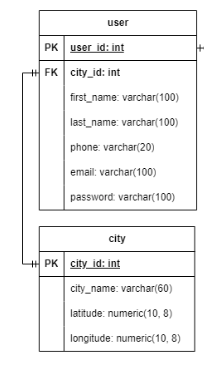

In [50]:
# Ekstrak file city.csv menjadi list of dictionary
city_table = csv_to_dict('../../dummy-data/city.csv')

In [52]:
show_data(city_table)

+-----------+----------------------+------------+-------------+
|  city_id  | city_name            |  latitude  |  longitude  |
|-----------+----------------------+------------+-------------|
|   3171    | Kota Jakarta Pusat   |  -6.18649  |   106.834   |
|   3172    | Kota Jakarta Utara   |  -6.12143  |   106.774   |
|   3173    | Kota Jakarta Barat   |  -6.1352   |   106.813   |
|   3174    | Kota Jakarta Selatan |  -6.30064  |   106.814   |
|   3175    | Kota Jakarta Timur   |  -6.26445  |   106.896   |
|   3573    | Kota Malang          |  -7.98189  |   112.627   |
|   3578    | Kota Surabaya        |  -7.28917  |   112.734   |
|   3471    | Kota Yogyakarta      |  -7.79722  |   110.369   |
|   3273    | Kota Bandung         |  -6.91474  |   107.61    |
|   1371    | Kota Padang          |   -0.95    |   100.353   |
|   1375    | Kota Bukittinggi     | -0.305556  |   100.369   |
|   6471    | Kota Balikpapan      |  -1.26354  |   116.828   |
|   6472    | Kota Samarinda       | -0.

In [57]:
def generate_name(n_name):
    """
    Fungsi untuk membuat nama dummy

    arg:
        - n_name (int) : jumlah data

    return:
        names (list) : list nama yang sudah dibuat
    """

    names = list()

    while len(names) < n_name:

        first_name = FAKER.first_name()
        last_name = FAKER.last_name()

        full_name = (f'{first_name} {last_name}')
        if full_name not in names:
            names.append(full_name)

    return names

In [217]:
def generate_dummy_user(n_data: int, city_table, is_print):
    """
    Create dummy data for user table
        arg:
        - n_data (int)  : Jumlah data
        - city_table (list)  : list of dictionary data 
        - is_print  (bool) : Jika True akan menampilkan hasil data

    return:
        - table  (list) : 
    """
    table = {}
    table['user_id'] = [i+1 for i in range(n_data)]
    table['city_id'] = [random.choice(city_table['city_id']) for i in range(n_data)]
    names = generate_name(100)
    table['first_name'] = [i.split(' ')[0] for i in names] 
    table['last_name'] = [i.split(' ')[1] for i in names] 
    table['last_name'] = [FAKER.last_name() for i in range(n_data)]
    table['phone'] = [FAKER.phone_number() for i in range(n_data)]
    table['email'] = [f"{name.lower().replace(' ', '')}@{FAKER.free_email_domain()}" \
                      for name in names]
    table['password'] = [hashlib.sha256(FAKER.password().encode()).hexdigest() for i in range(n_data)]
    
    if is_print:
        show_data(table)

    return table
        

In [218]:
user_table = generate_dummy_user(n_data = 100,
                                city_table = city_table,
                                is_print=True)

+-----------+-----------+--------------+-------------+---------------------+---------------------------------+------------------------------------------------------------------+
|  user_id  |  city_id  | first_name   | last_name   | phone               | email                           | password                                                         |
|-----------+-----------+--------------+-------------+---------------------+---------------------------------+------------------------------------------------------------------|
|     1     |   3273    | Mitra        | Budiman     | +62 (0684) 849-6257 | mitraprastuti@yahoo.com         | fdfa7bf012efbeab5070f35bd80704e8415f0b7b209a5d71335cd230f497afea |
|     2     |   6471    | Clara        | Hardiansyah | +62 (40) 957 1620   | clarasetiawan@hotmail.com       | 7678a464133d8054d1c6c79e770ec3782ef215e4339cbcf57e9cbd60eca58013 |
|     3     |   7371    | Bakda        | Mardhiyah   | +62 (38) 559 5786   | bakdamulyani@hotmail.com        |

### Data dummy table brand

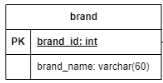

In [79]:
def generate_dummy_dim_table(n_data: int, header: list, list_names: list, is_print):
    """
    Create dummy data for brand table
        arg:
        - n_data (int)  : Jumlah data
        - is_print  (bool) : Jika True akan menampilkan hasil data

    return:
        - table  (list) : 
    """
    table = {}
    table[header[0]] = [i+1 for i in range(n_data)]
    table[header[1]] = [list_names[i % len(list_names)] for i in range(n_data)]
    
    if is_print:
        show_data(table)

    return table
        

In [81]:
brand_names = ['Toyota', 'Daihatsu', 'Honda', 'Suzuki']
header = ['brand_id', 'brand_name']
brand_table = generate_dummy_dim_table(len(brand_names), header, brand_names, True)

+------------+--------------+
|  brand_id  | brand_name   |
|------------+--------------|
|     1      | Toyota       |
|     2      | Daihatsu     |
|     3      | Honda        |
|     4      | Suzuki       |
+------------+--------------+


### Data dummy table model

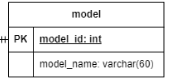

In [82]:
model_names = ['Toyota Yaris', 'Toyota Agya', 'Toyota Cahya', 'Toyota Calya', 'Daihatsu Alya', 'Daihatsu Terios', 
                   'Daihatsu Xenia', 'Honda Jazz', 'Honda CR-V', 'Honda Civic', 'Suzuki Ertiga']
header = ['model_id', 'model_name']
model_table = generate_dummy_dim_table(len(model_names), header, model_names, True)

+------------+-----------------+
|  model_id  | model_name      |
|------------+-----------------|
|     1      | Toyota Yaris    |
|     2      | Toyota Agya     |
|     3      | Toyota Cahya    |
|     4      | Toyota Calya    |
|     5      | Daihatsu Alya   |
|     6      | Daihatsu Terios |
|     7      | Daihatsu Xenia  |
|     8      | Honda Jazz      |
|     9      | Honda CR-V      |
|     10     | Honda Civic     |
|     11     | Suzuki Ertiga   |
+------------+-----------------+


In [83]:
body_type_names = ['Hatchback', 'Wagon', 'SUV', 'MPV', 'Sedan']
header = ['body_type_id', 'body_type_name']
body_type_table = generate_dummy_dim_table(len(body_type_names), header, body_type_names, True)

+----------------+------------------+
|  body_type_id  | body_type_name   |
|----------------+------------------|
|       1        | Hatchback        |
|       2        | Wagon            |
|       3        | SUV              |
|       4        | MPV              |
|       5        | Sedan            |
+----------------+------------------+


### Data dummy table car_product

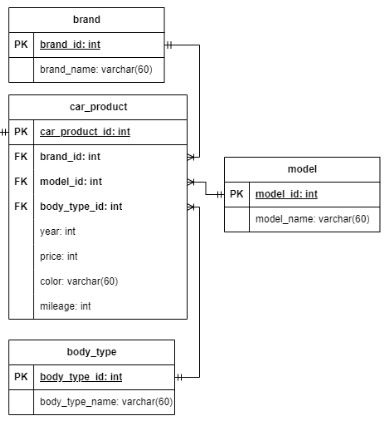

In [84]:
import random

def generate_random_color():
    """Generate a random RGB color code"""
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    
    return f'#{r:02x}{g:02x}{b:02x}'

In [89]:
def generate_dummy_product(n_data: int, is_print: bool):
    """
    Create dummy data for car_product table
        arg:
        - n_data (int)  : Jumlah data
        - is_print  (bool) : Jika True akan menampilkan hasil data

    return:
        - table  (list) : 
    """
    table = {}
    colors = ['Red', 'Blue', 'Green', 'White', 'Black', 'Silver', 'Gray']
    table['car_product_id'] = [i+1 for i in range(n_data)]
    table['brand_id'] = [random.choice(brand_table['brand_id']) for i in range(n_data)]
    table['model_id'] = []
    table['body_type_id'] = [random.choice(body_type_table['body_type_id']) for i in range(n_data)]
    table['year'] = [random.randint(2000, 2022) for i in range(n_data)]
    table['price'] = [random.randint(10000000, 500000000) for i in range(n_data)]
    table['color'] = [random.choice(colors) for i in range(n_data)]
    table['mileage'] = [random.randint(100, 10000) for i in range(n_data)]
    
    for brand_id in table['brand_id']:
        if brand_id == 1:
            table['model_id'].append(random.choice([1, 2, 3, 4]))
        elif brand_id == 2:
            table['model_id'].append(random.choice([5, 6, 7]))
        elif brand_id == 3:
            table['model_id'].append(random.choice([8, 9, 10]))
        elif brand_id == 4:
            table['model_id'].append(11)
    
    if is_print:
        show_data(table)

    return table

In [90]:
car_product_table = generate_dummy_product(100, True)

+------------------+------------+------------+----------------+--------+-----------+---------+-----------+
|  car_product_id  |  brand_id  |  model_id  |  body_type_id  |  year  |   price   | color   |  mileage  |
|------------------+------------+------------+----------------+--------+-----------+---------+-----------|
|        1         |     1      |     1      |       5        |  2013  | 288287645 | Green   |   5179    |
|        2         |     4      |     11     |       1        |  2012  | 57250511  | Black   |   6696    |
|        3         |     3      |     10     |       5        |  2021  | 224639054 | Silver  |   2981    |
|        4         |     3      |     8      |       5        |  2009  | 416009251 | Red     |   3893    |
|        5         |     1      |     2      |       1        |  2015  | 381226468 | Green   |   3056    |
|        6         |     4      |     11     |       5        |  2017  | 492983562 | Gray    |   5290    |
|        7         |     1      |    

### Data dummy advertisement model

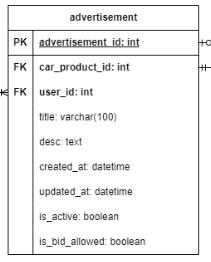

In [200]:
def generate_dummy_advertisement(n_data: int, is_print: bool):
    """
    Create dummy data for advertisement table
        arg:
        - n_data (int)  : Jumlah data
        - is_print  (bool) : Jika True akan menampilkan hasil data

    return:
        - table  (list) : 
    """
    table = {}
    car_product_ids = list(set(car_product_table['car_product_id'])) # get unique car product IDs
    random.shuffle(car_product_ids) # shuffle the list of IDs
    ad_car_product_ids = car_product_ids[:n_data] # get n_data IDs for the advertisements
    
    table['advertisement_id'] = [i+1 for i in range(n_data)]
    table['car_product_id'] = ad_car_product_ids
    table['user_id'] = [random.choice(user_table['user_id']) for i in range(n_data)]
    table['title'] = [f"Advertisement {i}" for i in range(n_data)]
    table['description'] = [f"This is advertisement {i}" for i in range(n_data)]
    table['created_at'] = [datetime.now() - timedelta(days=i) for i in range(n_data)]
    table['updated_at'] = [random.choice([None, datetime.now() - timedelta(days=i)]) for i in range(n_data)]
    table['is_active'] = [True for i in range(n_data)]
    table['is_bid_allowed'] = [True for i in range(n_data)]
    
    
    if is_print:
        show_data(table)

    return table

In [201]:
advertisement_table = generate_dummy_advertisement(100, True)

+--------------------+------------------+-----------+------------------+--------------------------+----------------------------+----------------------------+-------------+------------------+
|  advertisement_id  |  car_product_id  |  user_id  | title            | description              | created_at                 | updated_at                 | is_active   | is_bid_allowed   |
|--------------------+------------------+-----------+------------------+--------------------------+----------------------------+----------------------------+-------------+------------------|
|         1          |        2         |    36     | Advertisement 0  | This is advertisement 0  | 2023-04-13 17:08:43.732485 |                            | True        | True             |
|         2          |        69        |    92     | Advertisement 1  | This is advertisement 1  | 2023-04-12 17:08:43.732485 | 2023-04-12 17:08:43.732485 | True        | True             |
|         3          |        7         |    

In [115]:
type(advertisement_table['is_bid_allowed'][26])

bool

### Data dummy advertisement model

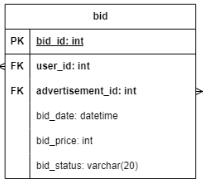

In [204]:
def generate_dummy_bid(n_data: int, is_print: bool):
    """
    Create dummy data for bid table
        arg:
        - n_data (int)  : Jumlah data
        - is_print  (bool) : Jika True akan menampilkan hasil data

    return:
        - table  (list) : 
    """
    table = {}

    bid_status = ['Sent', 'Cancelled']
    table['bid_id'] = [i+1 for i in range(n_data)]
    table['user_id'] = [random.choice(user_table['user_id']) for i in range(n_data)]
    table['advertisement_id'] = [random.choice(advertisement_table['advertisement_id']) for i in range(n_data)]
    table['bid_date'] = []
    table['bid_price'] = [random.randint(20000000, 700000000) for i in range(n_data)]
    table['bid_status'] = [random.choice(bid_status) for i in range(n_data)]

    # generate random bid dates between 1 and 7 days before today
    today = datetime.now()
    for i in range(n_data):
        bid_date = today - timedelta(days=random.randint(1, 7))
        table['bid_date'].append(bid_date.strftime('%Y-%m-%d %H:%M:%S'))
    
    
    if is_print:
        show_data(table)

    return table

In [205]:
bid_table = generate_dummy_bid(150, True)

+----------+-----------+--------------------+---------------------+-------------+--------------+
|  bid_id  |  user_id  |  advertisement_id  | bid_date            |  bid_price  | bid_status   |
|----------+-----------+--------------------+---------------------+-------------+--------------|
|    1     |    97     |         86         | 2023-04-08 17:09:05 |  353603651  | Sent         |
|    2     |    91     |         14         | 2023-04-12 17:09:05 |  359331279  | Cancelled    |
|    3     |    87     |         82         | 2023-04-12 17:09:05 |  89901201   | Sent         |
|    4     |    15     |         50         | 2023-04-06 17:09:05 |  657478289  | Cancelled    |
|    5     |    36     |         30         | 2023-04-12 17:09:05 |  696215284  | Cancelled    |
|    6     |     4     |         10         | 2023-04-09 17:09:05 |  679886548  | Cancelled    |
|    7     |    25     |         65         | 2023-04-10 17:09:05 |  265464160  | Cancelled    |
|    8     |    14     |      

## Simpan menjadi file csv

In [207]:
def save_to_csv(data, nama_file):
    '''
    Fungsi untuk menyimpan data dummy ke csv

    args:
        - data (list)     : list of dictionary data yang akan dijadikan csv
        - nama_file (str) : nama untuk file csv
	
	return:
		- None
    '''
   
    # Membuat file csv
    with open(file = '../../dummy-data/'+nama_file+'.csv', mode = 'w', newline = '') as csv_file:
        # Membuat writer csv
        writer = csv.writer(csv_file)

        # write header csv
        writer.writerow(list(data.keys()))
        
        # mengetahui panjang data
        len_data = len(list(data.items())[0][1])
        
        # write data ke file csv
        for i in range(len_data):
            row = []
            for key in data.keys():
                row.append(data[key][i])
            writer.writerow(row)

In [219]:
# user
save_to_csv(data = user_table,
            nama_file = 'user')

In [209]:
# brand
save_to_csv(data = brand_table,
            nama_file = 'brand')

In [210]:
# model
save_to_csv(data = model_table,
            nama_file = 'model')

In [211]:
# body_type
save_to_csv(data = body_type_table,
            nama_file = 'body_type')

In [213]:
# car_product
save_to_csv(data = car_product_table,
            nama_file = 'car_product')

In [214]:
# advertisement
save_to_csv(data = advertisement_table,
            nama_file = 'advertisement')

In [215]:
# bid
save_to_csv(data = bid_table,
            nama_file = 'bid')